# **Model Clustering untuk Segmentasi Penjual di Platform Olist**

## **Business Problem**
Olist adalah perusahaan yang meneydiakan perangkat lunak berbasis cloud (Saas) yang menghubungkan penjual dengan berbagai marketplace besar di Brasil [[1]](https://tracxn.com/d/companies/olist/__CMW0T0XDiabVcanXT6RE1RkX1lZRPOJNImBhisXLVxg#about-the-company). Perusahaan ini menghadapi tantangan dalam mengalokasikan layanan tambahan seperti promosi, logistik, dan pembiayaan kepada ribuan penjual di platform-nya. Selama ini, layanan tersebut diberikan secara merata tanpa mempertimbangkan performa atau potensi bisnis dari masing-masing penjual.

Tanpa segmentasi yang tepat, sumber daya perusahaan berisiko dialokasikan ke penjual yang kurang produktif, yang pada akhirnya dapat menyebabkan pemborosan biaya, tidak maksimalnya peningkatan penjualan, dan menurunnya kepuasan pelanggan. Selain itu, Olist tidak memiliki mekanisme otomatis untuk mengidentifikasi penjual berkinerja tinggi yang seharusnya diprioritaskan mendapatkan dukungan lebih besar.

## **Goals**
Berdasarkan permasalahan tersebut, Olist ingin mengembangkan sistem segmentasi penjual berbasis machine learning (clustering) untuk mengelompokkan penjual berdasarkan perilaku dan performa bisnis mereka.

Dengan strategi ini, Olist dapat lebih fokus memberikan dukungan kepada penjual potensial, serta mengambil tindakan pembinaan atau evaluasi terhadap penjual dengan performa rendah.

## **Analytic Approach**
Langkah pertama yang dilakukan adalah memahami data bisnis dan perilaku penjual di platform Olist. Pada kasus ini tujuan utamanya adalah seller, dipilih data-data dari seller yang dapat digunakan pada proses clustering seperti data transaksi, ulasan pelanggan, waktu pemrosesan pesanan, dan frekuensi penjualan, review, dan pendapatan. Data-data tersebut dikumpulkan dan diolah menjadi dataframe penjual. Setelah itu, data melalui tahap cleaning dengan mengecek duplikat, null value, dan mengubah tipe data. Kemudian data tersebut dilakukan Normalisasi fitur menggunakan StandardScaler atau RobustScaler.

Dilakukan clustering menggunakan algoritma unsupervised learning K-Means untuk mengelompokkan penjual ke dalam beberapa segmen berdasarkan kemiripan perilaku bisnis. Segmentasi kemudian divalidasi menggunakan metrik seperti Silhouette Score dan inertia untuk mendapatkan nilai cluster yang optimal. Selanjutnya Hasil dianalisis untuk memberikan insight karakteristik masing-masing cluster yang akan digunakan untuk pengambilan keputusan dalam mengalokasikan layanan tambahan secara lebih strategis.

## **Data Understanding**
Dataset Olist merupakan kumpulan data e-commerce yang berasal dari Olist Store, sebuah platform e-commerce dari Brasil yang memungkinkan seller lokal menjual produk mereka di berbagai marketplace besar di Brasil, seperti Mercado Livre, B2W Digital, dan lainnya. Transaksi dalam dataset ini tercatat dari tahun 2016 hingga 2018.

source: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce


Dataset awal yang terdiri dari 9 tabel mengalami proses seleksi terlebih dahulu. Karena fokus utama analisis adalah pada penjual (seller), maka dilakukan pemilihan kolom-kolom yang relevan dari tabel seller untuk digunakan dalam proses machine learning

| Attribute                   | Data Type | Description                                                               |
| --------------------------- | --------- | ------------------------------------------------------------------------- |
| `seller_id`                 | Object    | ID unik untuk masing-masing penjual di platform Olist.                    |
| `seller_city`               | Object    | Kota tempat penjual berada.                                               |
| `seller_state`              | Object    | Provinsi tempat penjual berada.                                           |
| `total_orders`              | Float     | Total jumlah pesanan yang diproses oleh penjual.                          |
| `total_transaction_revenue` | Float     | Total pendapatan dari transaksi penjualan (sebelum dikurangi biaya lain). |
| `total_freight_value`       | Float     | Total nilai ongkos kirim dari semua transaksi penjual.                    |
| `total_payment_value`       | Float     | Total nilai pembayaran yang diterima oleh penjual dari pelanggan.         |
| `average_order_value`       | Float     | Nilai rata-rata per transaksi pesanan.                                    |
| `average_review_score`      | Float     | Skor ulasan rata-rata dari pelanggan untuk penjual.                       |
| `first_order_month`         | Datetime    | Bulan pertama penjual menerima pesanan di Olist (format: YYYY-MM).        |
| `last_order_month`          | Datetime    | Bulan terakhir penjual menerima pesanan di Olist (format: YYYY-MM).       |
| `active_months`             | Integer   | Jumlah bulan penjual aktif menerima pesanan.                              |
| `total_products_sold`       | Integer   | Total jumlah produk yang terjual oleh penjual.                            |
| `total_subscription_fee`    | Float     | Total biaya langganan yang dibayarkan penjual ke Olist.                   |
| `processing_time_days`      | Float     | Rata-rata waktu pemrosesan pesanan (dalam hari).                          |



## **Import Library dan Load Dataset**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# clustering
from sklearn.cluster import KMeans

#Silhoutte score
from sklearn.metrics import silhouette_score

In [ ]:
!gdown 1G-CzxVen5UNVzkD2gGKXA-RKBRjV99cn
df_seller = pd.read_csv("df_seller.csv", header=0)
df_seller

Downloading...
From: https://drive.google.com/uc?id=1G-CzxVen5UNVzkD2gGKXA-RKBRjV99cn
To: /content/df_seller.csv
100% 385k/385k [00:00<00:00, 6.28MB/s]


,seller_id,seller_city,seller_state,total_orders,total_transaction_revenue,total_freight_value,total_payment_value,average_order_value,average_review_score,first_order_month,last_order_month,active_months,total_products_sold,processing_time_days,total_subscription_fee
0,0015a82c2db000af6aaaf3ae2ecb0532,santo andre,SP,1.0,274.80,63.06,2748.06,895.00,5.0,2017-09,2017-10,2,1,1.728322,91.8
1,001cca7ae9ae17fb1caed9dfb1094831,cariacica,ES,11.0,4715.28,8631.93,47151.70,99.00,5.0,2017-02,2018-07,17,5,1.728009,780.3
2,002100f778ceb8431b7a1020ff7ab48f,franca,SP,6.0,241.34,810.42,2412.64,17.90,5.0,2017-09,2018-04,8,2,2.641030,367.2
3,003554e2dce176b5555353e4f3555ac8,goiania,GO,1.0,13.94,19.38,139.38,120.00,5.0,2017-12,2017-12,1,1,0.523623,45.9
4,004c9cd9d87a3c30c522c48c4fc07416,ibitinga,SP,9.0,2753.40,4033.38,27533.95,109.99,5.0,2017-01,2018-05,17,4,1.047998,780.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2951,ffc470761de7d0232558ba5e786e57b7,guarulhos,SP,3.0,238.26,447.77,2382.53,30.05,5.0,2018-02,2018-08,7,2,1.029329,321.3
2952,ffdd9f82b9a447f6f8d4b91554cc7dd3,curitiba,PR,1.0,348.08,716.51,3481.10,84.30,5.0,2017-03,2018-08,11,2,4.672616,504.9
2953,ffeee66ac5d5a62fe688b9d26f83f534,mirassol,SP,2.0,225.99,419.69,2259.55,129.99,5.0,2017-09,2018-05,7,1,3.810561,321.3
2954,fffd5413c0700ac820c7069d66d98c89,amparo,SP,3.0,1177.00,2610.14,11769.77,122.30,5.0,2017-07,2018-08,14,3,1.470972,642.6


In [ ]:
df_seller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   seller_id                  2956 non-null   object 
 1   seller_city                2956 non-null   object 
 2   seller_state               2956 non-null   object 
 3   total_orders               2956 non-null   float64
 4   total_transaction_revenue  2956 non-null   float64
 5   total_freight_value        2956 non-null   float64
 6   total_payment_value        2956 non-null   float64
 7   average_order_value        2956 non-null   float64
 8   average_review_score       2956 non-null   float64
 9   first_order_month          2956 non-null   object 
 10  last_order_month           2956 non-null   object 
 11  active_months              2956 non-null   int64  
 12  total_products_sold        2956 non-null   int64  
 13  processing_time_days       2956 non-null   float

In [ ]:
# Konversi kolom waktu ke datetime
datetime_cols = [
    'first_order_month',
    'last_order_month'
]

for col in datetime_cols:
    df_seller[col] = pd.to_datetime(df_seller[col], errors='coerce')


In [ ]:
df_seller.describe()

,total_orders,total_transaction_revenue,total_freight_value,total_payment_value,average_order_value,average_review_score,first_order_month,last_order_month,active_months,total_products_sold,processing_time_days,total_subscription_fee
count,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2956,2956,2956.000000,2956.000000,2956.000000,2956.000000
mean,3.310217,653.843691,757.429530,6538.383451,161.838207,4.493572,2017-10-10 06:08:46.116373504,2018-04-05 13:01:52.043301632,5.400541,2.047361,2.859424,247.884844
min,1.000000,1.520000,0.750000,15.220000,4.780000,1.000000,2016-09-01 00:00:00,2016-10-01 00:00:00,1.000000,1.000000,0.019931,45.900000
25%,1.000000,32.650000,50.735000,326.457500,44.900000,4.000000,2017-04-01 00:00:00,2018-02-01 00:00:00,2.000000,1.000000,1.043006,91.800000
50%,1.000000,126.640000,165.730000,1266.460000,82.995000,5.000000,2017-11-01 00:00:00,2018-07-01 00:00:00,3.000000,1.000000,1.804363,137.700000
75%,3.000000,491.185000,588.660000,4911.817500,153.411250,5.000000,2018-04-01 00:00:00,2018-08-01 00:00:00,8.000000,2.000000,3.262292,367.200000
max,92.000000,50519.870000,53212.440000,505195.810000,6735.000000,5.000000,2018-08-01 00:00:00,2018-08-01 00:00:00,21.000000,21.000000,61.150509,963.900000
std,6.653639,2142.020417,2399.759645,21420.060764,324.813363,0.930564,NaN,NaN,4.988032,1.611231,3.696444,228.950654


## **LRFM**

LRFM adalah singkatan dari Length, Recency, Frequency, Monetary. Ini adalah teknik analisis pemasaran yang digunakan untuk mengelompokkan pelanggan berdasarkan perilaku mereka. Pada kasus ini pelanggan Olist merupakan seller yang berlangganan di perusahaan tersebut. Berikut merupakan penjelasan dari tiap komponennya:

1. **Length** (Lama Aktif): Menunjukkan sudah berapa lama penjual aktif di platform. Penjual yang sudah lama aktif cenderung lebih berkomitmen dan memiliki loyalitas tinggi terhadap platform.

2. **Recency** (Terakhir Aktif): Mengukur kapan terakhir kali penjual melakukan transaksi. Semakin baru mereka aktif, semakin besar kemungkinan mereka masih berminat dan aktif berjualan.

3. **Frequency** (Frekuensi Transaksi): Menunjukkan seberapa sering penjual melakukan transaksi (per bulan). Penjual yang sering bertransaksi cenderung lebih produktif dan memberikan pendapatan yang tinggi terhadap perusahaan.

4. **Monetary** (Total Nilai Penjualan): Menunjukkan total nilai penjualan yang telah dicapai penjual. Penjual dengan nilai tinggi berpotensi memberikan kontribusi besar terhadap pendapatan platform.

**Length**

* Mengukur lamanya hubungan antara penjual dan perusahaan (dalam satuan bulan)
* Length dihitung dari tanggal transaksi pertama (first_order_month) hingga tanggal transaksi terakhir (last_order_month) yang dilakukan penjual dengan asumsi penjual baru memulai berlangganan semenjak bulan transaksi pertama hingga bulan pada transaksi terakhir

In [ ]:
# Length
df_seller['length'] = (
    (df_seller['last_order_month'].dt.year - df_seller['first_order_month'].dt.year) * 12 +
    (df_seller['last_order_month'].dt.month - df_seller['first_order_month'].dt.month)
) + 1

Berikut merupakan contoh dataframe dari kolom length. Baris pada setiap data memiliki seller_id yang berbeda yang berarti masing-masing baris merupakan length seller yang berbeda

In [ ]:
df_length=df_seller[['seller_id','first_order_month','last_order_month','length']]
df_length.sample(5, random_state=42)

,seller_id,first_order_month,last_order_month,length
1956,a8739afb32aaa45e01815ca76f76f54b,2018-06-01,2018-08-01,3
2309,c79151301b9d90985d1fa52879213105,2017-11-01,2017-12-01,2
930,50770d25768b0486d89be26afca3108f,2017-12-01,2018-07-01,8
1213,6806dad1da97bfb5a9038eac6881f706,2017-12-01,2018-08-01,9
2090,b5dd7151a92ccaaa282cbe9681a05f44,2018-07-01,2018-07-01,1


Contohnya pada index ke 1956, seller mulai berjualan (transaksi pertama) terjadi pada tanggal 2018-06-01 dan transaksi terakhirnya pada tanggal 2018-08-01, sehingga diasumsikan masa aktif seller tersebut 3 bulan

**Recency**

* Recency mengukur berapa lama waktu sejak penjual terakhir kali melakukan transaksi hingga saat ini. Semakin kecil nilai recency, semakin baru penjual melakukan transaksi, dan semakin besar kemungkinan mereka masih aktif di platform.
* Digunakan data pada kolom 'last_order_month' dengan asumsi penjual terakhir aktif berjualan pada tanggal tersebut

Diasumsikan analisis dilakukan pada jumlah hari paling maks kolom last_order_date (h+1 tanggal transaksi terbaru diasumsikan sebagai hari data dianalisis)

In [ ]:
# Analysis Date
analysis_date = df_seller['last_order_month'].max() + pd.DateOffset(months=1)
analysis_date

Timestamp('2018-09-01 00:00:00')

Nilai recency diukur dari bulan transaksi terakhir masing-masing penjual hingga tanggal analisis

In [ ]:
# Recency
df_seller['recency'] = (
    (analysis_date.year - df_seller['last_order_month'].dt.year) * 12 +
    (analysis_date.month - df_seller['last_order_month'].dt.month)
)

Berikut merupakan contoh dataframe dari kolom recency. Baris pada setiap data memiliki seller_id yang berbeda yang berarti masing-masing baris merupakan seller yang berbeda

In [ ]:
df_recency=df_seller[['seller_id','last_order_month','recency']]
df_recency.sample(5, random_state=42)

,seller_id,last_order_month,recency
1956,a8739afb32aaa45e01815ca76f76f54b,2018-08-01,1
2309,c79151301b9d90985d1fa52879213105,2017-12-01,9
930,50770d25768b0486d89be26afca3108f,2018-07-01,2
1213,6806dad1da97bfb5a9038eac6881f706,2018-08-01,1
2090,b5dd7151a92ccaaa282cbe9681a05f44,2018-07-01,2


Contohnya pada index ke 1956, transaksi terakhir seller berada pada tanggal 2018-08-01 dan tanggal data dianalisis diasumsikan pada tanggal 2018-09-01, sehingga recency seller tersebut 1 bulan

**Frequency**

* Frequency mengukur seberapa sering penjual melakukan transaksi order dalam sebulan
* digunakan kolom total_order yang didapatkan dari count pada kolom order penjual

In [ ]:
# Frequency
df_seller['frequency'] = df_seller['total_orders']

Berikut merupakan contoh dataframe dari kolom frequency. Baris pada setiap data memiliki seller_id yang berbeda yang berarti masing-masing baris merupakan seller yang berbeda

In [ ]:
df_freq=df_seller[['seller_id','total_orders']]
df_freq.sample(5, random_state=42)

,seller_id,total_orders
1956,a8739afb32aaa45e01815ca76f76f54b,6.0
2309,c79151301b9d90985d1fa52879213105,1.0
930,50770d25768b0486d89be26afca3108f,1.0
1213,6806dad1da97bfb5a9038eac6881f706,1.0
2090,b5dd7151a92ccaaa282cbe9681a05f44,1.0


Contohnya pada index ke 1956, penjual melakukan transaksi sebanyak kurang lebih 6 kali per bulan dia aktif di platform

**Monetary**

* Monetary menunjukkan total nilai penjualan (total revenue) yang telah dihasilkan oleh seorang penjual selama mereka bergabung dengan platform Olist

In [ ]:
# Monetary
df_seller['monetary'] = df_seller['total_payment_value']

Berikut merupakan contoh dataframe dari kolom monetary. Baris pada setiap data memiliki seller_id yang berbeda yang berarti masing-masing baris merupakan seller yang berbeda

In [ ]:
df_monetary=df_seller[['seller_id','monetary']]
df_monetary.sample(5, random_state=42)

,seller_id,monetary
1956,a8739afb32aaa45e01815ca76f76f54b,712.44
2309,c79151301b9d90985d1fa52879213105,1499.84
930,50770d25768b0486d89be26afca3108f,247.86
1213,6806dad1da97bfb5a9038eac6881f706,2745.92
2090,b5dd7151a92ccaaa282cbe9681a05f44,103.70


Contohnya pada index ke 1956, penjual mendapatkan pendapatan sebanyak 712.44 BRL selama dia bergabung dengan platform

**Sample Dataframe LRFM**

In [ ]:
df_lrfm = df_seller[['seller_id', 'length', 'recency', 'frequency', 'monetary']]
df_lrfm.head()


,seller_id,length,recency,frequency,monetary
0,0015a82c2db000af6aaaf3ae2ecb0532,2,11,1.0,2748.06
1,001cca7ae9ae17fb1caed9dfb1094831,18,2,11.0,47151.70
2,002100f778ceb8431b7a1020ff7ab48f,8,5,6.0,2412.64
3,003554e2dce176b5555353e4f3555ac8,1,9,1.0,139.38
4,004c9cd9d87a3c30c522c48c4fc07416,17,4,9.0,27533.95


**Dataframe Cluster**

Pada dataframe cluster ditambahkan kolom review dan time_process yang digunakan sebagai feature tambahan dalam proses clusterring seller

In [ ]:
df_cluster=df_lrfm.copy()
df_cluster['review']=df_seller['average_review_score']
df_cluster['time_process']=df_seller['processing_time_days']
df_cluster.head()

,seller_id,length,recency,frequency,monetary,review,time_process
0,0015a82c2db000af6aaaf3ae2ecb0532,2,11,1.0,2748.06,5.0,1.728322
1,001cca7ae9ae17fb1caed9dfb1094831,18,2,11.0,47151.70,5.0,1.728009
2,002100f778ceb8431b7a1020ff7ab48f,8,5,6.0,2412.64,5.0,2.641030
3,003554e2dce176b5555353e4f3555ac8,1,9,1.0,139.38,5.0,0.523623
4,004c9cd9d87a3c30c522c48c4fc07416,17,4,9.0,27533.95,5.0,1.047998


## **K-means**

K-Means Clustering adalah salah satu metode dalam machine learning yang digunakan untuk mengelompokkan data ke dalam beberapa kelompok atau cluster berdasarkan kemiripan karakteristiknya. Pada kasus ini kita ingin membagi penjual menjadi beberapa tipe berdasarkan karakteristik mereka, pembagian cluster ini dilakukan agar dapat memberikan promosi yang sesuai dengan karakteristik penjual.



Cara kerjanya dimulai dengan menentukan jumlah kelompok (cluster) yang diinginkan. Setelah itu, algoritma memilih beberapa centroid (k) secara acak. Setiap data kemudian dihitung jaraknya ke titik pusat tersebut, lalu data akan dimasukkan ke kelompok dengan jarak terdekat. Setelah semua data dikelompokkan, posisi titik pusat akan dihitung ulang berdasarkan rata-rata posisi data dalam setiap cluster. Proses ini diulang beberapa kali hingga kelompok-kelompoknya tidak banyak berubah lagi. Hasil akhirnya adalah data yang terbagi ke dalam kelompok-kelompok yang memiliki pola atau karakteristik yang mirip. ([source](https://dqlab.id/konsep-model-machine-learning-k-means-clustering))

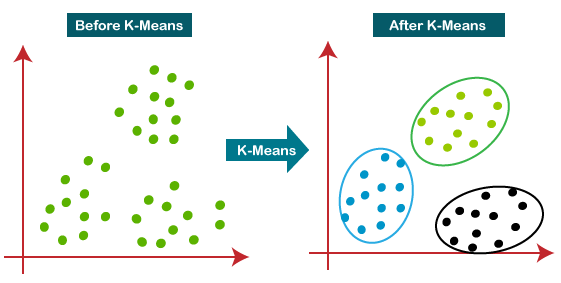

**Define X**

Pertama dilakukan drop pada kolom seller_id karena kolom tersebut bersifat bersifat unik dan tidak merepresentasikan karakteristik dari penjual. Jika dimasukkan ke model, K-Means akan mencoba membentuk cluster berdasarkan angka ID yang tidak punya arti atau korelasi dengan variabel lain.

In [ ]:
X = df_cluster.drop(columns='seller_id')
X

,length,recency,frequency,monetary,review,time_process
0,2,11,1.0,2748.06,5.0,1.728322
1,18,2,11.0,47151.70,5.0,1.728009
2,8,5,6.0,2412.64,5.0,2.641030
3,1,9,1.0,139.38,5.0,0.523623
4,17,4,9.0,27533.95,5.0,1.047998
...,...,...,...,...,...,...
2951,7,1,3.0,2382.53,5.0,1.029329
2952,18,1,1.0,3481.10,5.0,4.672616
2953,9,4,2.0,2259.55,5.0,3.810561
2954,14,1,3.0,11769.77,5.0,1.470972


**Scalling kolom numerik**

Sebelum dilakukan proses clustering dengan K-Means, data terlebih dahulu disiapkan melalui proses transformasi dan scaling.

Kolom monetary ditransformasi dengan np.log1p untuk mengurangi skew akibat variasi nilai yang tinggi dan outlier ekstrem, sehingga distribusinya lebih mendekati normal. Setelah itu, kolom tersebut discaling menggunakan StandardScaler karena hasil transformasi log membuat kolom tersebut memiliki distribusi data yang lebih normal dan cocok dengan metode scaler yang digunakan.

Kolom length, recency, frequency, review, dan time_process discaling menggunakan RobustScaler karena metode ini lebih tahan terhadap outlier. RobustScaler bekerja dengan mengurangi median dan membaginya dengan rentang interkuartil (IQR), sehingga lebih stabil saat data mengandung nilai ekstrim.

In [ ]:
X = X.copy()

# Mengurangi skew kolom monetary
X['monetary_log'] = np.log1p(X['monetary'])

# Memisahkan kolom untuk scaling
X_robust = X[['length', 'recency', 'frequency', 'review', 'time_process']]
X_standard = X[['monetary_log']]

# Scaling
robust_scaler = RobustScaler()
standard_scaler = StandardScaler()

X_robust_scaled = robust_scaler.fit_transform(X_robust)
X_standard_scaled = standard_scaler.fit_transform(X_standard)

X_scaled = pd.DataFrame(
    data = np.hstack([X_robust_scaled, X_standard_scaled]),
    columns = list(X_robust.columns) + ['monetary'],
    index = X.index
)
X_scaled.head()

,length,recency,frequency,review,time_process,monetary
0,-0.333333,1.500000,0.0,0.0,-0.034264,0.406665
1,1.444444,0.000000,5.0,0.0,-0.034405,1.967778
2,0.333333,0.500000,2.5,0.0,0.376998,0.335192
3,-0.444444,1.166667,0.0,0.0,-0.577096,-1.227243
4,1.333333,0.333333,4.0,0.0,-0.340815,1.672304


### **Cek Nilai Inertia (Elbow Method)**

Dilakukan pengecekan nilai Intertia untuk menentukan jumlah cluster yang optimal. Inertia adalah jumlah total kuadrat jarak antara setiap titik data ke pusat (centroid) cluster-nya. Semakin kecil inertia, semakin baik model memetakan titik-titik ke cluster masing-masing.

In [ ]:
list_inertia = []

for i in range(2,9):
    # modeling k-means
    kmeans = KMeans(n_clusters=i, random_state=0)

    # fit
    kmeans.fit(X_scaled)

    # labels
    kmeans.labels_

    # inertia
    inertia = kmeans.inertia_
    list_inertia.append(inertia)

In [ ]:
df_inertia = pd.DataFrame()
df_inertia['n_clusters'] = range(2,9)
df_inertia['inertia'] = list_inertia

df_inertia

,n_clusters,inertia
0,2,29596.675498
1,3,21669.994535
2,4,16719.544931
3,5,13904.822912
4,6,12127.108775
5,7,10523.444353
6,8,9629.400712


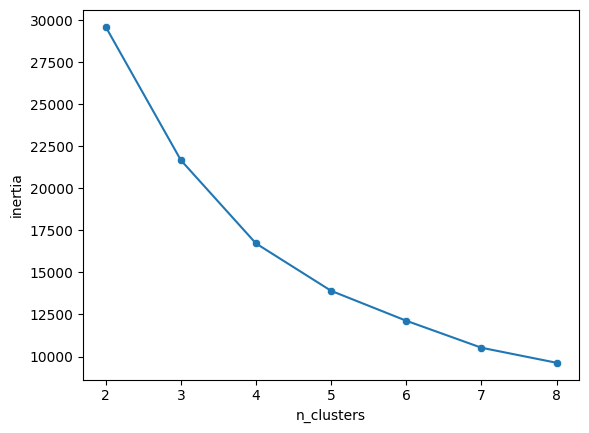

In [ ]:
# Elbow plot
sns.scatterplot(data = df_inertia, x = 'n_clusters', y='inertia')
sns.lineplot(data = df_inertia, x = 'n_clusters', y='inertia')

plt.show()

Berdasarkan grafik terjadi penurunan nilai inertia yang cukup signifikan dari cluster 2 ke 4. Namun setelah n_cluster lebih dari 4 penurunan mulai melambat dan mendatar (titik elbow terdapat di n_cluster=4)

### **Cek Nilai Sillhouette**

Selain menggunakan elbow method untuk menentukan jumlah cluster, digunakan Silhouette Score untuk mengevaluasi kualitas cluster. Proses ini dilakukan untuk mengukur seberapa cocok setiap titik data dengan cluster tempatnya berada dibandingkan dengan cluster lainnya. Nilai sillhouette yang semakin tinggi berarti semakin baik cluster yang dihasilkan

Silhouette Score:
$$
s = \frac{b - a}{\max(a, b)}
$$


a = rata-rata jarak intra-cluster (dengan cluster yang sama)

b = rata-rata jarak ke cluster tetangga terdekat

In [ ]:
list_sil = []

for i in range(2,9):
    # modeling k-means
    kmeans = KMeans(n_clusters=i, random_state=0)

    # fit
    kmeans.fit(X_scaled)

    # labels
    cluster_name = kmeans.labels_

    # silhoutte
    sil = silhouette_score(X_scaled, labels = cluster_name, random_state=0)
    list_sil.append(sil)

In [ ]:
df_inertia['silhoutte_score'] = list_sil

In [ ]:
df_inertia.sort_values('silhoutte_score', ascending=False)

,n_clusters,inertia,silhoutte_score
0,2,29596.675498,0.833415
2,4,16719.544931,0.587903
1,3,21669.994535,0.564398
4,6,12127.108775,0.267874
3,5,13904.822912,0.264418
6,8,9629.400712,0.251978
5,7,10523.444353,0.244055


Berdasarkan hasil yang didapat, pemilihan cluster dilakukan dengan memilih nilai inertia yang tidak terlalu besar dan memiliki silhoutte score yang tinggi, tetapi memiliki nilai n yang tidak terlalu banyak atau terlalu sedikit. Sehingga dipilih n_cluster=4

### **Modeling with best k**

Setelah mendapatkan jumlah cluster yang optimal dilakukan modeling dengan menggunakan KMeans dengan nilai n=4

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X_scaled)

KMeans(n_clusters=4, random_state=0)

In [ ]:
df_cluster['cluster'] = kmeans.labels_
df_cluster

,seller_id,length,recency,frequency,monetary,review,time_process,cluster
0,0015a82c2db000af6aaaf3ae2ecb0532,2,11,1.0,2748.06,5.0,1.728322,2
1,001cca7ae9ae17fb1caed9dfb1094831,18,2,11.0,47151.70,5.0,1.728009,1
2,002100f778ceb8431b7a1020ff7ab48f,8,5,6.0,2412.64,5.0,2.641030,2
3,003554e2dce176b5555353e4f3555ac8,1,9,1.0,139.38,5.0,0.523623,2
4,004c9cd9d87a3c30c522c48c4fc07416,17,4,9.0,27533.95,5.0,1.047998,1
...,...,...,...,...,...,...,...,...
2951,ffc470761de7d0232558ba5e786e57b7,7,1,3.0,2382.53,5.0,1.029329,2
2952,ffdd9f82b9a447f6f8d4b91554cc7dd3,18,1,1.0,3481.10,5.0,4.672616,2
2953,ffeee66ac5d5a62fe688b9d26f83f534,9,4,2.0,2259.55,5.0,3.810561,2
2954,fffd5413c0700ac820c7069d66d98c89,14,1,3.0,11769.77,5.0,1.470972,2


## **Analisis Cluster**

### **Distribusi Data per Cluster**

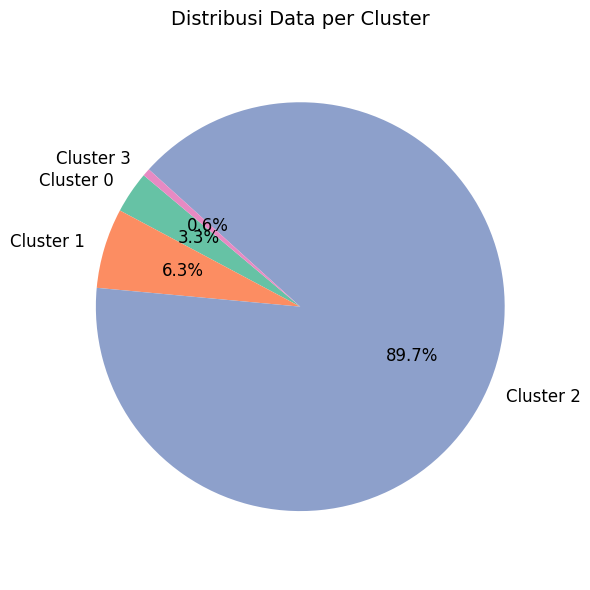

In [ ]:
cluster_counts = df_cluster['cluster'].value_counts().sort_index()

labels = [f'Cluster {i}' for i in cluster_counts.index]

plt.figure(figsize=(6, 6))
plt.pie(
    cluster_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set2.colors,
    textprops={'fontsize': 12, 'color': 'black'}
)
plt.title('Distribusi Data per Cluster', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()


In [ ]:
df_cluster['cluster'].value_counts()

,count
cluster,
2,2653
1,187
0,98
3,18


**Insight:**

Distribusi menunjukkan cluster seller cenderung berada di satu kelompok (Cluster 2) sebanyak 89.7% (2653 Seller), sementara tiga cluster lainnya relatif kecil. Hal ini menunjukkan bahwa terdapat beberapa seller yang memiliki karaktersitik tertentu yang berbeda dari karakteristik seller secara umum.

### **Plot Cluster**

In [ ]:
color_map = {
    '0' : 'red',
    '1' : 'green',
    '2' : 'blue',
}

fig = px.scatter_3d(
    df_cluster,
    x='recency',
    y='frequency',
    z='monetary',
    color='cluster',
    color_discrete_map=color_map,
)

fig.update_traces(marker_size = 3)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  title={
                    'text': "RFM segmentation",
                    'y':0.97,
                    'x':0.45,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                    legend=dict(
                      yanchor="top",
                      y=0.97,
                      xanchor="left",
                      x=0.70,
                      itemsizing='constant',
                      itemwidth = 30))

fig.update_xaxes(tickformat=".0f")

### **Cluster Analysis Heatmap**

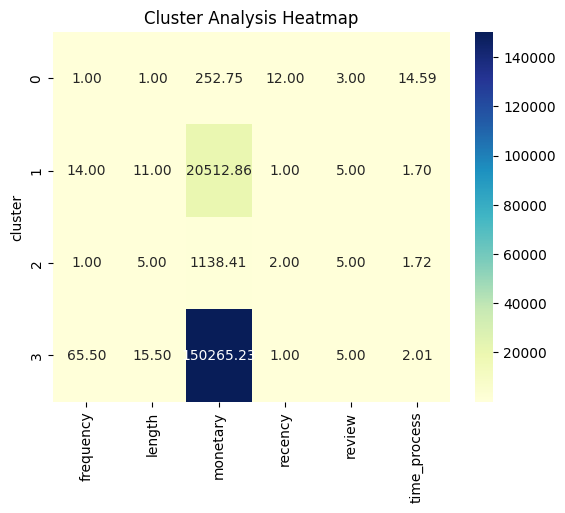

In [ ]:
lrfm_heatmap = df_cluster.pivot_table(index='cluster', values=['length', 'recency', 'frequency', 'monetary','time_process','review'], aggfunc='median')

sns.heatmap(lrfm_heatmap, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Cluster Analysis Heatmap')
plt.show()

**Analisis**

### **Cluster 0 (Dormant Seller)**

* Terdiri dari **98 seller (±3,3%)**
* **Karakteristik Median:**

  * `frequency`: **1 transaksi** per bulan
  * `length`: hanya **1 bulan** aktif
  * `monetary`: sekitar **252,75 BRL**
  * `recency`: tidak aktif selama **12 bulan**
  * `review`: skor ulasan **3**/5
  * `time_process`: sangat lambat (**14,59 hari**)
* **Interpretasi:**

  * Ini adalah kelompok seller tidak aktif atau memiliki kinerja buruk. Skor review pelanggan rendah, tidak aktif hampir setahun, dan waktu pengiriman sangat lambat. Sebaiknya dikeluarkan dari prioritas promosi atau ditindaklanjuti untuk reaktivasi.

### **Cluster 1 (Potensial Seller)**

* Kelompok ini terdiri dari **187 seller (±6,3%)**
* **Karakteristik Median:**

  * `frequency`: **14** transaksi per bulan
  * `length`: aktif selama **11 bulan**
  * `monetary`: total pendapatan sekitar **20.512,86 BRL**
  * `recency`: aktif dalam **1 bulan terakhir**
  * `review`: skor ulasan **5**/5
  * `time_process`: waktu pemrosesan pesanan selama **1,70 hari**
* **Interpretasi:**

  * Seller yang aktif dan konsisten. Ulasan bagus, frekuensi sedang, dan proses cepat. Kelompok ini berpotensi menjadi High-Value Seller. Cocok untuk difokuskan dalam pelatihan lanjutan dan program loyalitas.

### **Cluster 2 (Regular Seller)**

* Cluster ini merupakan kelompok **mayoritas**, dengan jumlah seller sebanyak **2.653 (±89,7%)**
* **Karakteristik Median:**

  * `frequency`: **1** kali transaksi per bulan
  * `length`: **5 bulan** aktif di platform Olist
  * `monetary`: total pendapatan sekitar **1.138,41 BRL**
  * `recency`: terakhir aktif **2 bulan lalu**
  * `review`: nilai ulasan **5**/5
  * `time_process`: waktu proses pesanan sekitar **1,72 hari**
* **Interpretasi:**

  * Kelompok ini adalah kelompok seller pasif atau pemula. Jumlah transaksi dan pendapatan sangat rendah, walaupun ulasan bagus dan proses cepat. Mereka berpotensi meninggalkan platform jika tidak diberikan dukungan lebih. Perlu edukasi, dukungan, dan promosi onboarding agar bisa berkembang.


### **Cluster 3 (High-Value Seller)**

* Hanya terdiri dari **18 seller (±0,6%)**
* **Karakteristik Median:**

  * `frequency`: **65,5** transaksi per bulan
  * `length`: aktif selama **15,5 bulan**
  * `monetary`: total pendapatan sekitar **150.265,25 BRL**
  * `recency`: aktif dalam **1 bulan terakhir**
  * `review`: skor ulasan **5**/5
  * `time_process`: pengiriman cepat (**2,01 hari**)
* **Interpretasi:**

  * Ini adalah seller yang memberi kontribusi tinggi bagi perusahaan. Sangat aktif dan berpengalaman. Harus dipertahankan loyalitasnya melalui program eksklusif, dukungan prioritas, dan kolaborasi khusus.


**Mapping cluster menjadi Nama**

In [ ]:
cluster_names = {
    0: 'Dormant Seller',
    2: 'Regular Seller',
    1: 'Potensial Seller',
    3: 'High-Value Seller'
}

df_cluster['cluster'] = df_cluster['cluster'].replace(cluster_names)


## **Kesimpulan**

Berdasarkan analisis clustering terhadap penjual di platform Olist menggunakan algoritma K-Means dan pendekatan LRFM (Length, Recency, Frequency, Monetary), serta dua variabel tambahan (review dan time_process), diperoleh empat segmen utama penjual dengan karakteristik yang berbeda:

1. **Cluster 0 – Dormant Seller (3.3%)** : Penjual yang tidak aktif selama lebih dari 12 bulan, hanya memiliki 1 bulan masa aktif, frekuensi transaksi rendah, pendapatan sangat kecil, serta waktu pemrosesan sangat lambat. Penjual ini memiliki performa sangat buruk. Tidak responsif dan berisiko tinggi churn. Sebaiknya dikeluarkan dari prioritas atau diberikan intervensi khusus untuk reaktivasi.

2. **Cluster 1 – Potensial Seller (6.3%)**: Penjual dengan frekuensi transaksi menengah, skor ulasan tinggi, aktif selama hampir setahun, dan waktu pemrosesan sangat cepat. Kelompok ini berpotensi besar menjadi High-Value Seller. Perlu perhatian melalui dukungan promosi, pelatihan lanjutan, atau program loyalitas.

3. **Cluster 2 – Regular Seller (89.7%)**: Mayoritas seller berada di cluster ini. Frekuensi transaksi sangat rendah, pendapatan kecil, dan masa aktif sedang bulan. Kelompok ini adalah penjual pasif atau pemula. Meskipun memiliki ulasan baik dan waktu proses cepat, performanya belum optimal. Membutuhkan edukasi, aktivasi ulang, atau onboarding ulang.

4. **Cluster 3 – High-Value Seller (0.6%)**: Penjual dengan performa sangat tinggi, total pendapatan sangat tinggi, skor ulasan tinggi, dan aktif. Menjadi segmen dengan kontribusi pendapatan paling tinggi bagi perusahaan. Harus dijaga loyalitasnya melalui program eksklusif seperti bantuan modal, dukungan logistik, dan promosi prioritas.

## **Saran**

1. **Fokus pada High-Value dan Potensial Seller**

- Berikan insentif eksklusif seperti promosi bersponsor, dukungan logistik yang paling baik, dan akses pinjaman usaha kepada Cluster 1 dan Cluster 3.

- Terapkan program loyalitas dan retensi untuk menjaga dan meningkatkan kontribusi mereka terhadap revenue Olist.

2. **Aktivasi Ulang Regular Seller**
- Untuk Cluster 2, lakukan strategi onboarding ulang, edukasi bisnis online, dan pemberian insentif kecil atau pelatihan digital marketing agar mereka lebih aktif.

3. **Tindak Lanjut Dormant Seller**
- Seller di Cluster 0 dapat diidentifikasi sebagai resiko tinggi churn. Evaluasi apakah layak untuk diaktifkan kembali atau dikeluarkan dari prioritas alokasi sumber daya.

4. **Pengembangan Model Lebih Lanjut**
- Model dapat ditingkatkan dengan memasukkan lebih banyak fitur seperti data perilaku, data produk yang dijual, dan sebagainya.

## **Dashboard Visualisasi Clustering**
https://olistsellerclustering.streamlit.app/